# Student Performance Analysis


For this project I will predict student performance.

## Load packages and dataset

In [409]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import joblib

## EDA

In [410]:
file = 'StudentsPerformance.csv'
df = pd.read_csv(file)

In [411]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [412]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [414]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [415]:
df['total'] = round((df['math score'] + df['reading score'] + df['writing score'])/3).astype('int')

In [416]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


<AxesSubplot:xlabel='test preparation course', ylabel='total'>

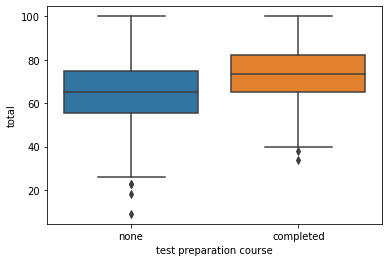

In [417]:
sns.boxplot(x="test preparation course", y="total", data=df)

<AxesSubplot:xlabel='lunch', ylabel='total'>

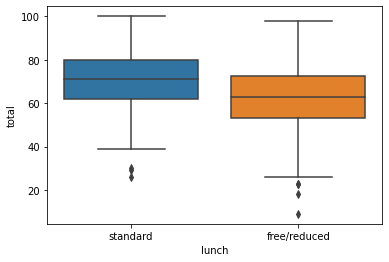

In [418]:
sns.boxplot(x="lunch", y="total", data=df)

<AxesSubplot:xlabel='parental level of education', ylabel='total'>

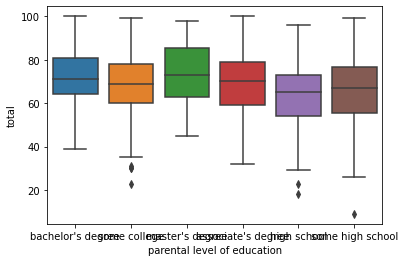

In [419]:
sns.boxplot(x="parental level of education", y="total", data=df)

In [420]:
df['race'] = df['race/ethnicity']
df = df.drop(['race/ethnicity'], axis=1)

<AxesSubplot:xlabel='race', ylabel='total'>

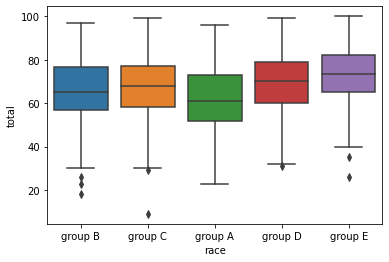

In [421]:
sns.boxplot(x="race", y="total", data=df)

<AxesSubplot:xlabel='gender', ylabel='total'>

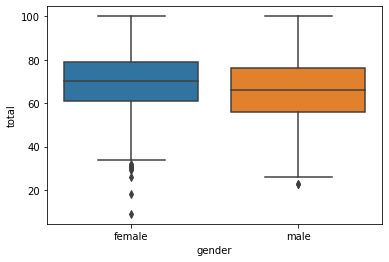

In [422]:
sns.boxplot(x="gender", y="total", data=df)

In [423]:
df = pd.get_dummies(df)

<AxesSubplot:>

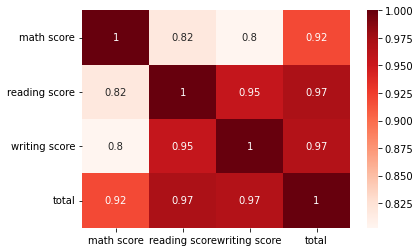

In [424]:
corrdf = df[['math score', 'reading score', 'writing score', 'total']]
corr=corrdf.corr()
sns.heatmap(corr, annot=True, cmap="Reds")

In [425]:
df.columns

Index(['math score', 'reading score', 'writing score', 'total',
       'gender_female', 'gender_male',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none', 'race_group A', 'race_group B',
       'race_group C', 'race_group D', 'race_group E'],
      dtype='object')

In [426]:
y = df['total']
dffeatures = ['gender_female', 'gender_male', 'race_group A', 'race_group B',
       'race_group C', 'race_group D', 'race_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']
X = df[dffeatures]

In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [428]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100 ,random_state=42)
randomforest.fit(X_train, y_train)
y_pred_random=randomforest.predict(X_test)

In [429]:
from sklearn.metrics import accuracy_score
# get feature importances and print them out
importances = randomforest.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.3f}')

# sort feature importances by importance score
indices = np.argsort(importances)[::-1]
sorted_features = [X.columns[i] for i in indices]

# print random forest accuracy on the whole dataset
print("random forest accuracy r^2: ", randomforest.score(X,y).round(2))

gender_female: 0.071
gender_male: 0.074
race_group A: 0.049
race_group B: 0.062
race_group C: 0.065
race_group D: 0.065
race_group E: 0.061
parental level of education_associate's degree: 0.069
parental level of education_bachelor's degree: 0.065
parental level of education_high school: 0.067
parental level of education_master's degree: 0.042
parental level of education_some college: 0.063
parental level of education_some high school: 0.065
lunch_free/reduced: 0.054
lunch_standard: 0.056
test preparation course_completed: 0.035
test preparation course_none: 0.037
random forest accuracy r^2:  0.23


In [430]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor(random_state=42)
decisiontree.fit(X_train, y_train)
ypred_dt = decisiontree.predict(X_test)

In [431]:
# Print the feature importances
importances = decisiontree.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.3f}')

# Print the accuracy of the decision tree
print("Decision tree accuracy: ", decisiontree.score(X, y).round(2))

gender_female: 0.026
gender_male: 0.082
race_group A: 0.027
race_group B: 0.056
race_group C: 0.063
race_group D: 0.053
race_group E: 0.042
parental level of education_associate's degree: 0.026
parental level of education_bachelor's degree: 0.045
parental level of education_high school: 0.062
parental level of education_master's degree: 0.031
parental level of education_some college: 0.026
parental level of education_some high school: 0.040
lunch_free/reduced: 0.000
lunch_standard: 0.226
test preparation course_completed: 0.102
test preparation course_none: 0.094
Decision tree accuracy:  0.31


In [432]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
linearregpred = linearreg.predict(X_test)
linearreg.score(X_test,y_test)

0.14178032673896257

In [433]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,  r2_score

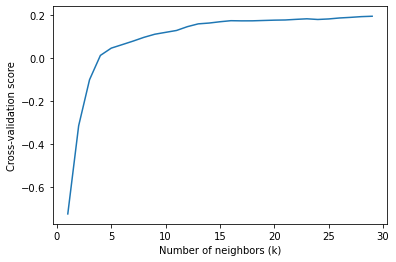

In [434]:
cv_scores = []
for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="r2")
    cv_scores.append(scores.mean())

# Plot the cross-validation scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(1, 30), cv_scores)
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Cross-validation score")
plt.show()

In [435]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

# Make predictions on the test data and compute the mean squared error
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 score:", r2)
print("Mean squared error:", mse)
print("Accuracy: ",r2)

RMSE: 14.314598645264212
R2 score: 0.04591024247003539
Mean squared error: 204.907734375
Accuracy:  0.04591024247003539


## Predict Pass/Fail

In [436]:
print("total over 60: ",(df['total'] >= 60).sum())
print("total under 60: ",(df['total'] < 60).sum())

total over 60:  720
total under 60:  280


In [437]:
df['pass'] = 0
df.loc[df['total']>= 60, 'pass'] = 1

In [438]:
df = df.drop(['math score', 'reading score', 'writing score', 'total'], axis=1)

In [439]:
X = df.drop('pass', axis= 1)
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [440]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.6


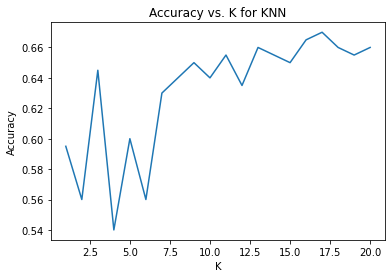

In [441]:
# Create the KNN classifier
n_neighbors = 5
weights = 'uniform'
algorithm = 'auto'
p = 2
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the accuracy for different values of k
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights, algorithm=algorithm, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for KNN")
plt.show()

## Decision Tree

In [442]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.675


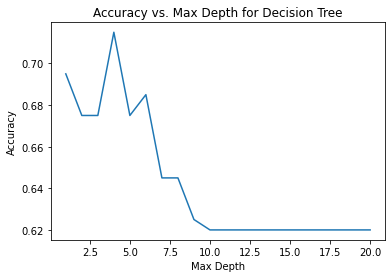

In [443]:
# Create the decision tree classifier
max_depth = 5
criterion = 'gini'
splitter = 'best'
min_samples_split = 2
min_samples_leaf = 1
clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, splitter=splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the accuracy for different values of max_depth
max_depths = range(1, 21)
accuracies = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, splitter=splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(max_depths, accuracies)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Max Depth for Decision Tree")
plt.show()

In [444]:
joblib.dump(clf, 'clf.joblib')

['clf.joblib']

## GUI

In [445]:
from tkinter import *

In [446]:
df.columns

Index(['gender_female', 'gender_male',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none', 'race_group A', 'race_group B',
       'race_group C', 'race_group D', 'race_group E', 'pass'],
      dtype='object')

In [447]:
def show_entry_fields():
    p1=e1.get()
    p2=e2.get()
    p3=e3.get()
    p4=e4.get()
    p5=e5.get()
    p6=e6.get()
    p7=e7.get()
    p8=e8.get()
    p9=e9.get()
    p10=e10.get()
    p11=e11.get()
    p12=e12.get()
    p13=e13.get()
    p14=e14.get()
    p15=e15.get()
    p16=e16.get()
    p17=e17.get()
  
    model = joblib.load('clf.joblib')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13,p14,p15,p16,p17]])
    
    if result == 0:
        Label(master, text="Fail").grid(row=31)
    else:
        Label(master, text="Pass").grid(row=31)
    
    
master = Tk()
master.title("Pass-Fail Using Machine Learning")


label = Label(master, text = "Pass-Fail Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master, text="gender_female").grid(row=1)
Label(master, text="gender_male").grid(row=2)
Label(master, text="parental level of education_associate's degree").grid(row=3)
Label(master, text="parental level of education_bachelor's degree").grid(row=4)
Label(master, text="parental level of education_high school").grid(row=5)
Label(master, text="parental level of education_master's degree").grid(row=6)
Label(master, text="parental level of education_some college").grid(row=7)
Label(master, text="parental level of education_some high school").grid(row=8)
Label(master, text="lunch_free/reduced").grid(row=9)
Label(master, text="lunch_standard").grid(row=10)
Label(master, text="test preparation course_completed").grid(row=11)
Label(master, text="test preparation course_none").grid(row=12)
Label(master, text="race_group A").grid(row=13)
Label(master, text="race_group B").grid(row=14)
Label(master, text="race_group C").grid(row=15)
Label(master, text="race_group D").grid(row=16)
Label(master, text="race_group E").grid(row=17)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()